In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [12]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS= 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [10]:
32*68

2176

In [13]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

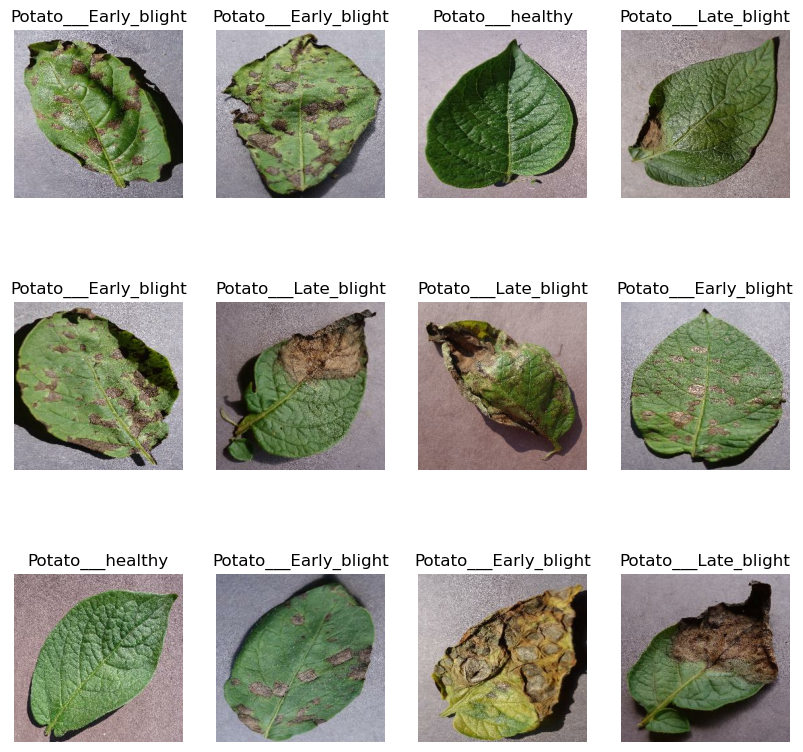

In [35]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4 ,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [36]:
len(dataset)

68

In [44]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [38]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [39]:
train_ds = dataset.take(54)
len(train_ds)

54

In [46]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [47]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [49]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [50]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [57]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1 , shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [58]:
train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)

In [59]:
len(train_ds)

54

In [60]:
len(val_ds)

6

In [62]:
len(test_ds)

8

In [ ]:
train_ds.cache().shuffle(1000).prefetch()